# **Customer Churn Analysis of Telecom Data**

The dataset is taken from a Kaggle case competiton and cosnsists of 21 columns.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline 


In [3]:
# Mounting colab with google drive to access the csv from there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
#importing the dataset 
telco_base_data = pd.read_csv("/content/drive/MyDrive/Customer_Churn_Telecom.csv")

In [5]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco_base_data.shape

(7043, 21)

In [7]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that TotalCharges field should be Numeric.
Hence, we would convert that field to numeric in the Data clening step.

In [ ]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.0, 'Count of Target variable per category')

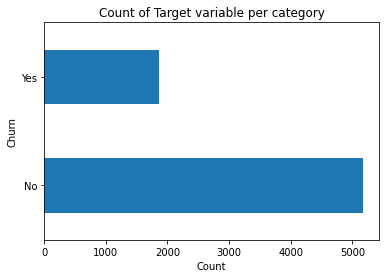

In [ ]:
telco_base_data['Churn'].value_counts().plot(kind = 'barh')
plt.xlabel("Count")
plt.ylabel("Churn")
plt.title("Count of Target variable per category")

In [ ]:
#Find the percentage of Customers who churned vs those who did not
100*telco_base_data["Churn"].value_counts()/len(telco_base_data["Churn"])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is imbalanced (ratio = 73:27). So lets take each category of Target variable seperately and draw insights from them.

In [ ]:
#Find null values in each column and deal with them
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Data Cleaning**

In [22]:
#Create a copy of the dataset
telco_data = telco_base_data.copy()

In [23]:
#Lets convert the TotalCharges column to Numeric.
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
# We can see that there are 11 missing values in the TotalCharges field.
# Since that number is very less we can simply remove the rows
telco_data.dropna(how = 'any', inplace = True)

To understand the data further, lets divide the data on the basis of tenure column.

In [ ]:
telco_data['tenure'].max()

72

In [25]:
# Group the tenure in a group of 12 months
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]
telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1,80,12), right = False, labels = labels)

In [26]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

**Data Exploration**

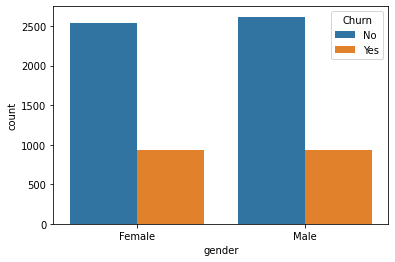

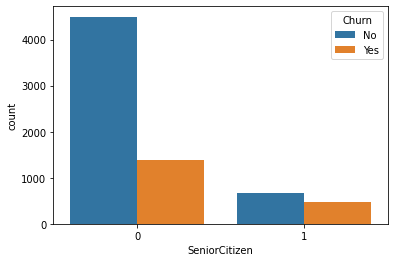

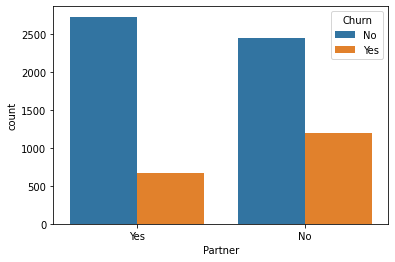

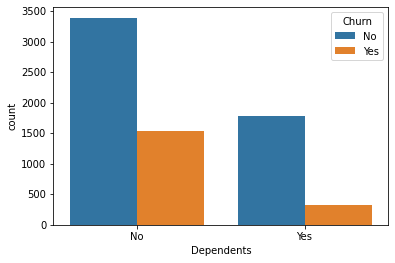

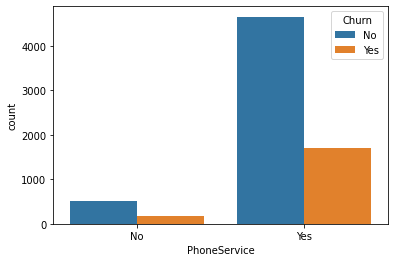

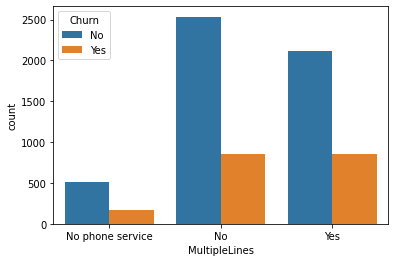

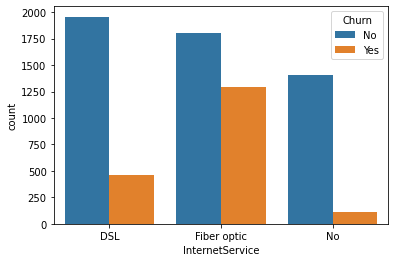

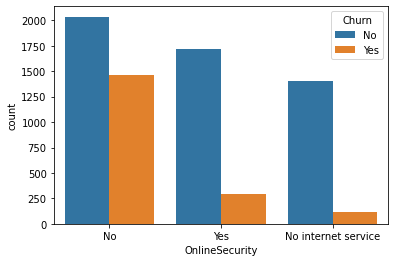

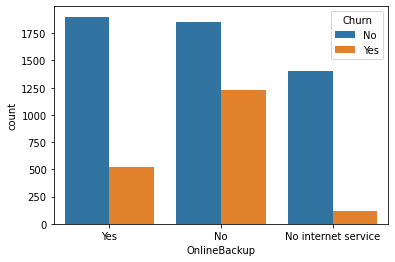

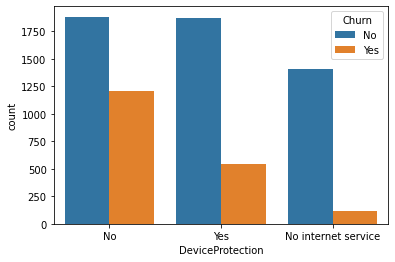

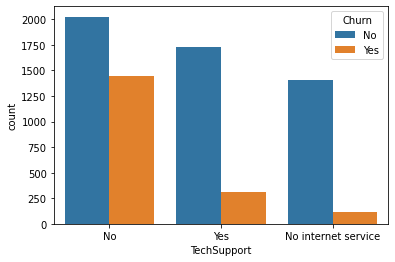

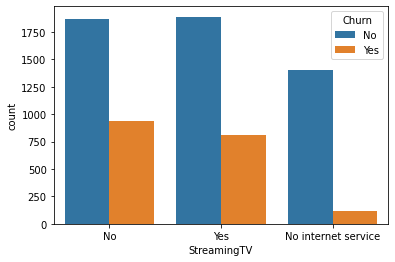

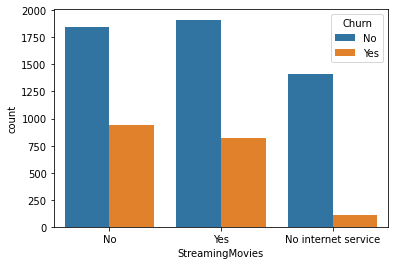

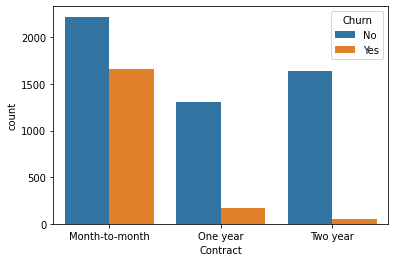

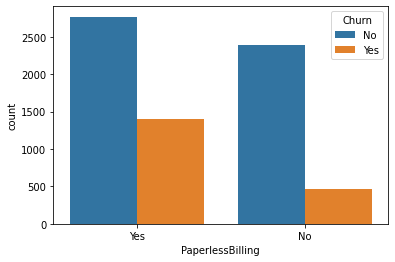

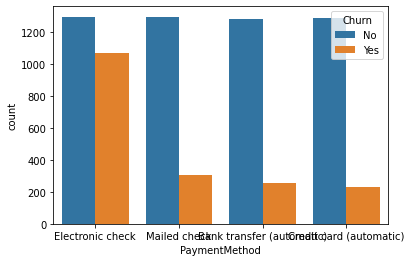

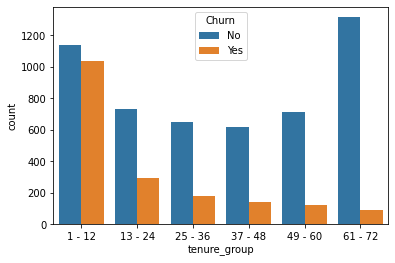

In [27]:
#Univariate Analysis
for i,predictor in enumerate(telco_data.drop(columns = ['Churn','TotalCharges', 'MonthlyCharges','customerID','tenure'])):
  plt.figure(i)
  sns.countplot(data= telco_data, x = predictor, hue = 'Churn')

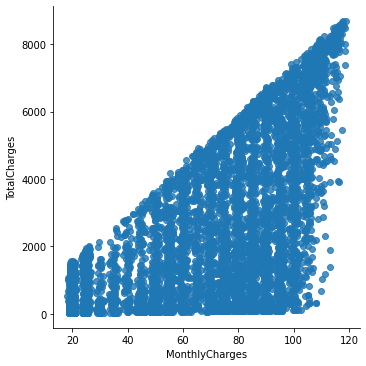

In [28]:
#Relationship between monthly charges and total charges
sns.lmplot(data=telco_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Converting the target variable into binary value

In [29]:
telco_data["Churn"] = np.where(telco_data.Churn == 'Yes',1,0)

Text(0.5, 1.0, 'Monthly charges by churn')

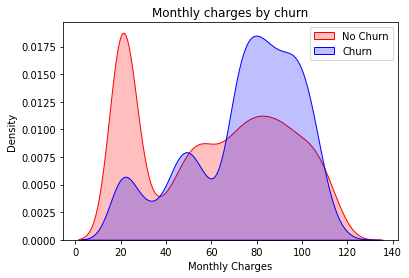

In [30]:
#Relationship between Monthly charges and churn
mt = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 0)], color = "Red", shade = True)
mt = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 1)], ax = mt, color = "Blue", shade = True)
mt.legend(["No Churn","Churn"],loc='upper right')
mt.set_ylabel('Density')
mt.set_xlabel('Monthly Charges')
mt.set_title('Monthly charges by churn')

Key Insight: Monthly charges have a direct relationship with Churn

Text(0.5, 1.0, 'Total charges by churn')

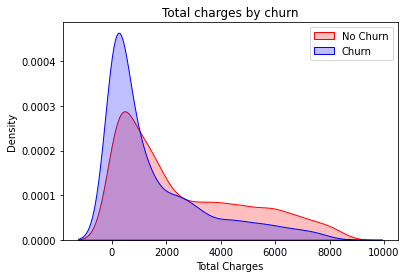

In [31]:
#Relationship between Total charges and churn
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Key Insight: Higher churn when the total charges are low.

Its a surprising insight. Combine monthly charges, tenure and total charges. Monthly Charges are higher for lower tenure plans. Their total charge is also less as its a lower tenure. Hence, their Churn rate is more.

Convert all categorical variables into dummy values

In [32]:
# Removing these columns because they will unecessarily create more columns in the getdummies step
telco_data.drop(columns= ['customerID','tenure','MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

In [33]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


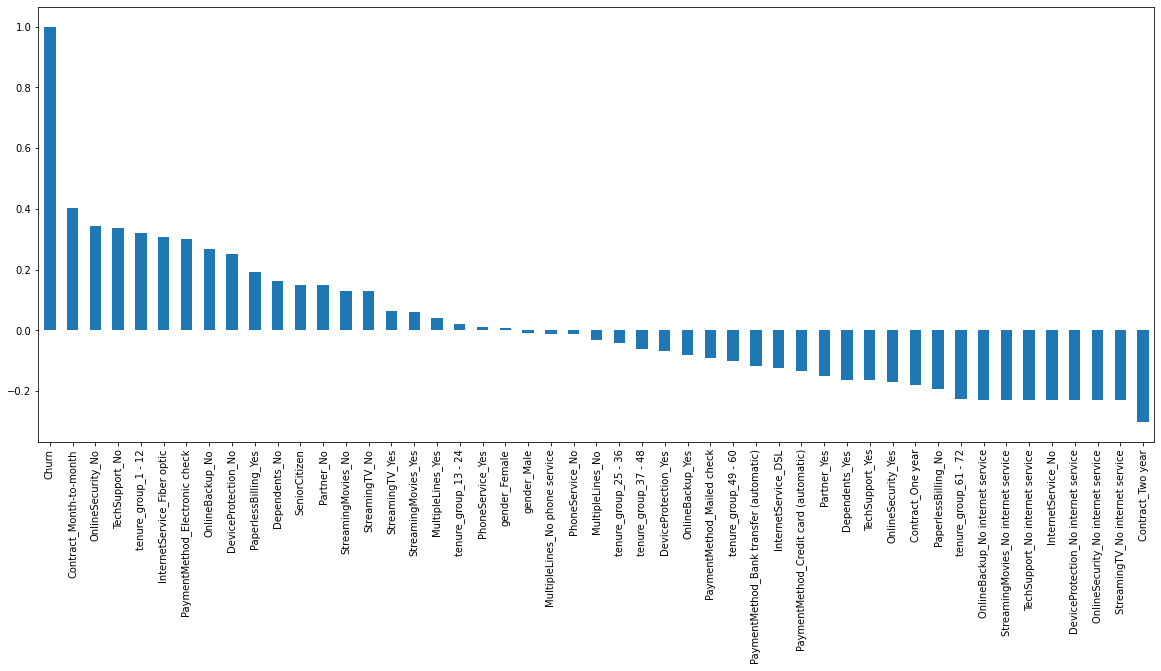

In [ ]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

**Bivariate Analysis**

In [34]:
df_target0 = telco_data.loc[telco_data["Churn"] == 0]
df_target1 = telco_data.loc[telco_data["Churn"] == 1]

In [35]:
#Writing the code for the design of the graphs
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

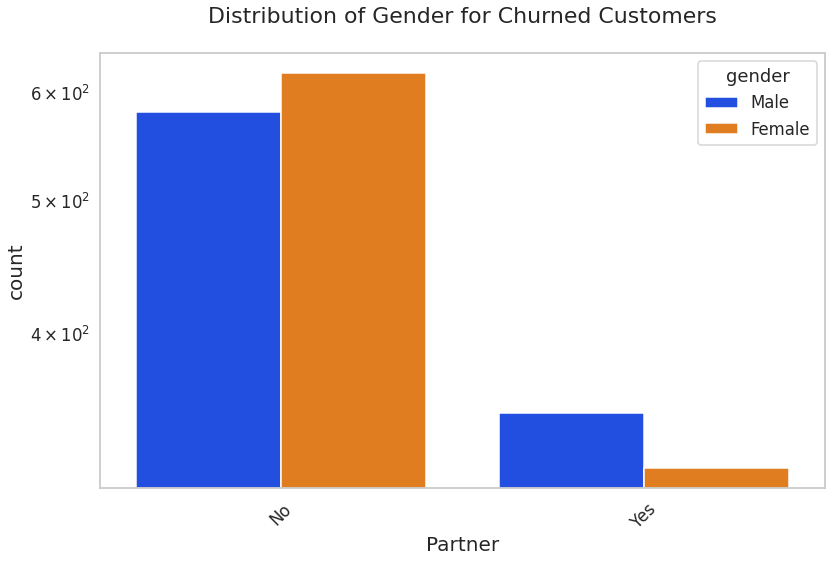

In [ ]:
uniplot(df_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

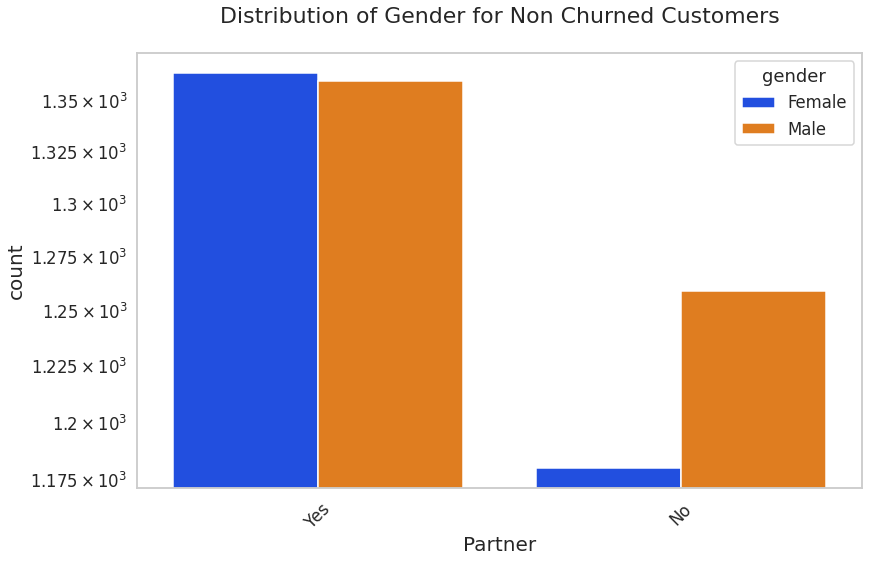

In [ ]:
uniplot(df_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

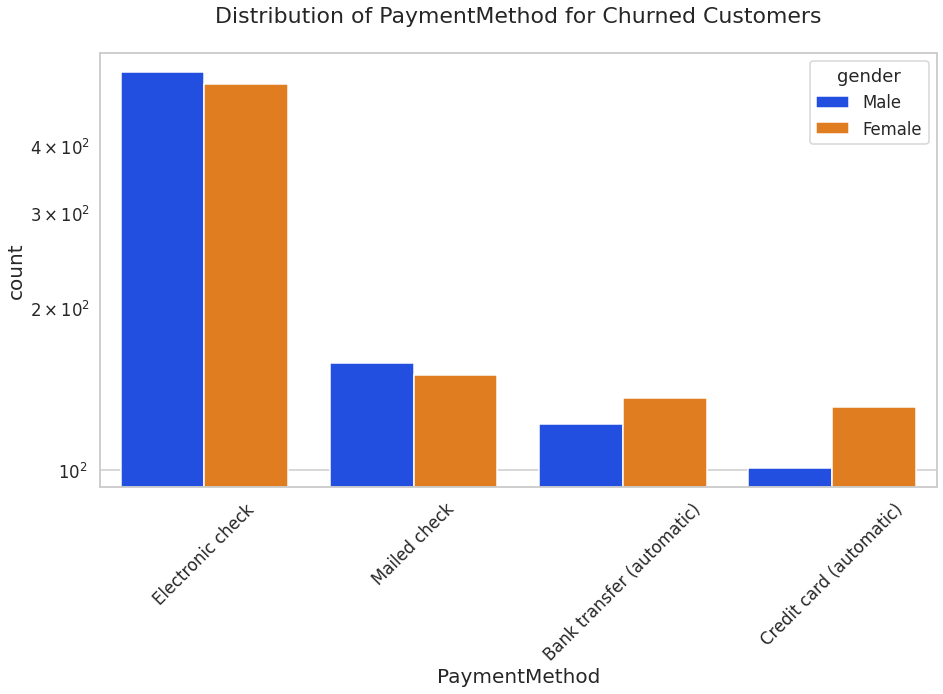

In [ ]:
uniplot(df_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

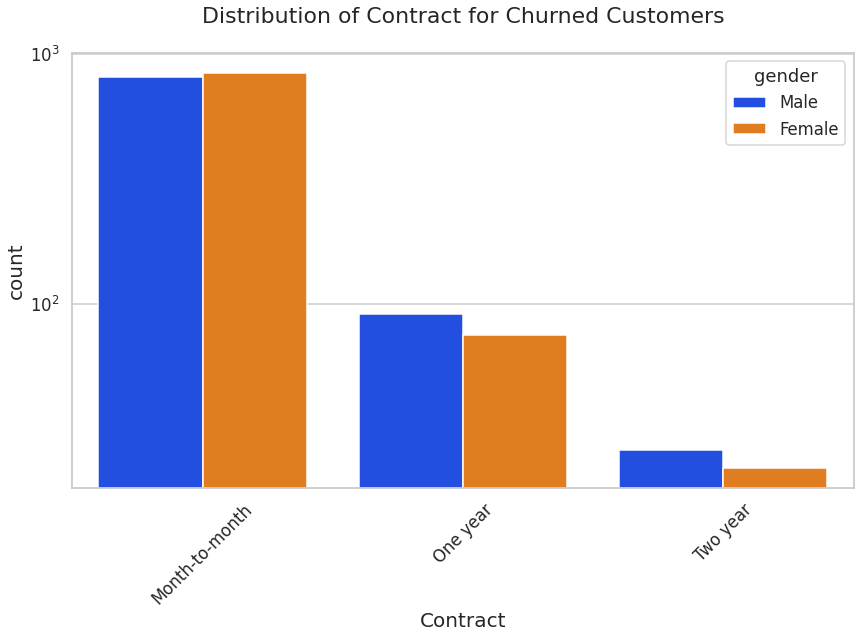

In [ ]:
uniplot(df_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

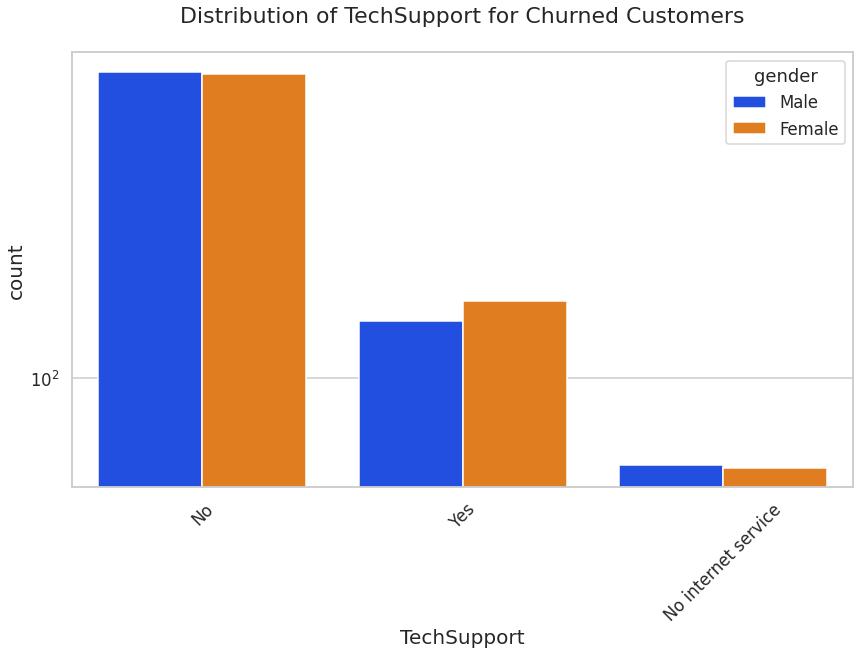

In [ ]:
uniplot(df_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

**Conclusion**

1. Monthly charges have a direct relationship with Churn. 
2. Combine monthly charges, tenure and total charges. Monthly Charges are  higher for lower tenure plans. Their total charge is also less as its a lower tenure. Hence, their Churn rate is more.
3. HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet
4. LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years.
5. Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn.
6. People using Electronic Checks, having month-to-month contracts, having no tech support seem more likely to be churners.
 

In [ ]:
#Export the csv file
telco_data_dummies.to_csv("telco_churn.csv")

In [36]:
from google.colab import files
telco_data_dummies.to_csv('telco_churn.csv') 
files.download('telco_churn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>